In [20]:
from sklearn.datasets import make_blobs
import mglearn
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, '특성 1')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


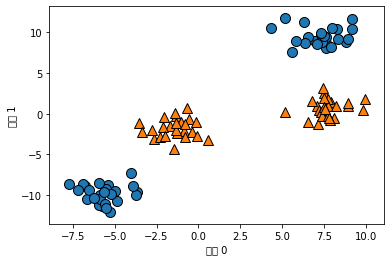

In [21]:
X,y = make_blobs(centers=4, random_state=8)
y= y % 2

mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Text(0, 0.5, '특성 1')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


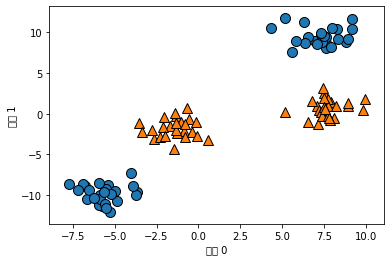

In [22]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X,y)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

Text(0.5, 0, '특성1 **2')

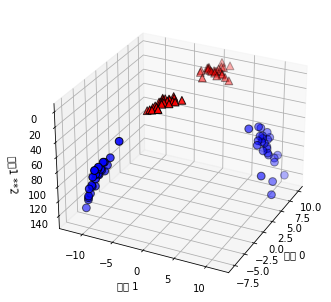

In [23]:
import numpy as np
X_new = np.hstack([X,X[:,1:] ** 2])
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
mask = y ==0
ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask,2],c='b',
          cmap = mglearn.cm2, s= 60, edgecolor='k')
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2],c='r',marker='^',
          cmap = mglearn.cm2, s= 60, edgecolor='k')
ax.set_xlabel("특성 0")
ax.set_ylabel("특성 1")
ax.set_zlabel("특성1 **2")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Text(0.5, 0, '특성1 **2')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


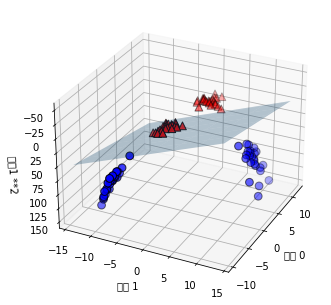

In [24]:
linear_svm_3d = LinearSVC().fit(X_new,y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:,0].min()-2,X_new[:,0].max()+2,50)
yy = np.linspace(X_new[:,1].min()-2,X_new[:,1].max()+2,50)

XX,YY = np.meshgrid(xx,yy)
ZZ= (coef[0] * XX +coef[1] * YY +intercept) / -coef[2]
ax.plot_surface(XX,YY,ZZ,rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask,2],c='b',
          cmap = mglearn.cm2, s= 60, edgecolor='k')
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2],c='r',marker='^',
          cmap = mglearn.cm2, s= 60, edgecolor='k')
ax.set_xlabel("특성 0")
ax.set_ylabel("특성 1")
ax.set_zlabel("특성1 **2")

Text(-0.03605466005187696, -0.08916951506369719, '특성 1')

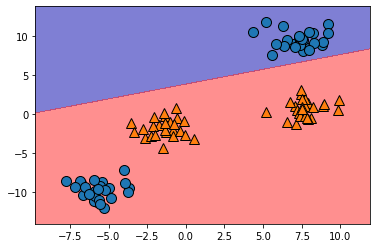

In [25]:
ZZ= YY * 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(),YY.ravel(),ZZ.ravel()])
plt.contourf(XX,YY , dec.reshape(XX.shape),levels=[dec.min(),0,dec.max()],
            cmap=mglearn.cm2, alpha = 0.5)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
ax.set_xlabel("특성 0")
ax.set_ylabel("특성 1")

Text(-0.03605466005187696, -0.08916951506369719, '특성 1')

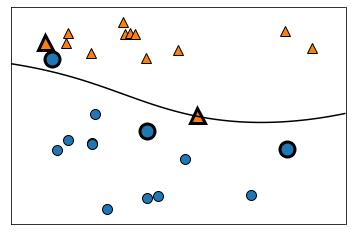

In [26]:
from sklearn.svm import SVC
X,y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf',C=10, gamma = 0.1).fit(X,y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
sv = svm.support_vectors_
sv_labels = svm.dual_coef_.ravel() >0
mglearn.discrete_scatter(sv[:,0],sv[:,1],sv_labels,s=15, markeredgewidth=3)
ax.set_xlabel("특성 0")
ax.set_ylabel("특성 1")

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47000 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53944 missing from c

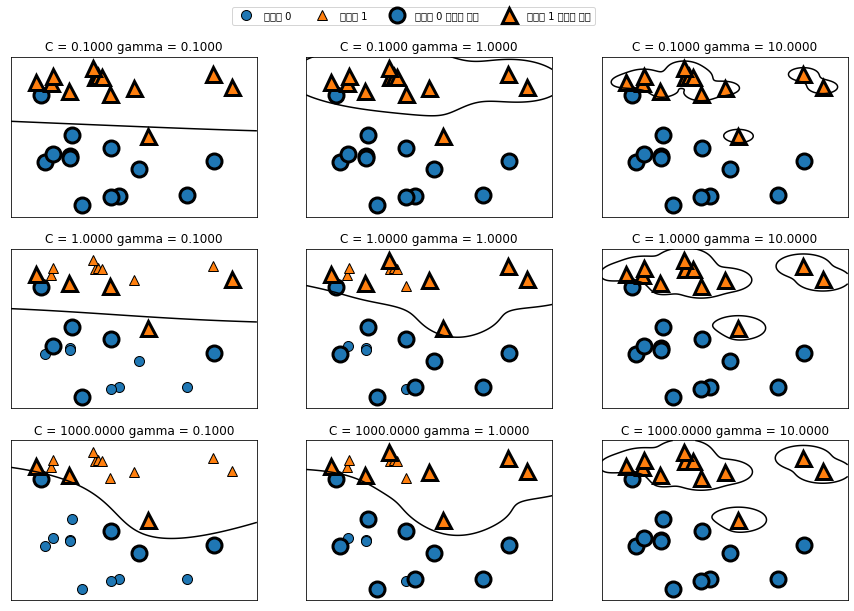

In [27]:
fig, axes = plt.subplots(3,3,figsize=(15,10))
for ax, C in zip(axes, [-1,0,3]):
    for a, gamma in zip(ax, range(-1,2)):
        mglearn.plots.plot_svm(log_C = C, log_gamma = gamma, ax = a)
axes[0,0].legend(["클래스 0","클래스 1","클래스 0 서포트 벡터"
                  ,"클래스 1 서포트 벡터"],ncol=4, loc=(.9,1.2))

In [28]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state =0)

svc = SVC()
svc.fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(svc.score(X_train,y_train)))
print("테스트 세트 점수: {:.2f}".format(svc.score(X_test,y_test)))

훈련 세트 점수: 0.90
테스트 세트 점수: 0.94


In [29]:
plt.boxplot(X_train, manage_xticks=False)
plt.yscale("symlog")
plt.xlabel("특성 목록")
plt.ylabel("특성 크기")

TypeError: boxplot() got an unexpected keyword argument 'manage_xticks'

In [30]:
min_on_training = X_train.min(axis=0)
range_on_training = (X_train - min_on_training).max(axis=0)

X_train_scaled = (X_train - min_on_training) /range_on_training
print("특성별 최솟값\n" , X_train_scaled.min(axis=0))
print("특성별 최댓값\n" , X_train_scaled.max(axis=0))

특성별 최솟값
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
특성별 최댓값
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [31]:
X_test_scaled = (X_test - min_on_training) /range_on_training

In [33]:
svc = SVC()
svc.fit(X_train_scaled, y_train)
print("훈련 세트 점수: {:.2f}".format(svc.score(X_train_scaled,y_train)))
print("테스트 세트 점수: {:.2f}".format(svc.score(X_test_scaled,y_test)))

훈련 세트 점수: 0.98
테스트 세트 점수: 0.97


In [34]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)
print("훈련 세트 점수: {:.2f}".format(svc.score(X_train_scaled,y_train)))
print("테스트 세트 점수: {:.2f}".format(svc.score(X_test_scaled,y_test)))

훈련 세트 점수: 1.00
테스트 세트 점수: 0.96
